# Linear and Quadratic Discriminant Analysis

## Linear Discriminant Analysis

### Classifying with Bayes' Theorem

In a previous chapter we discussed logistic regression for the case of two response classes (e.g. 0 and 1). It models the conditional probability $\Pr(Y=k|X=x)$ directly through the use of the Sigmoid function. In this chapter we discuss an alternative approach that models the distribution of the predictors $X$ separately for each response class (i.e. given $Y$), and then uses Bayes' theorem to transform these into conditional probabilities for $\Pr(Y=k|X=x)$. Its main advantage compared to logistic regressions is that if classes are well-separated, parameter estimates for logistic regression tend to be unstable whereas linear discriminant analysis (LDA) does not suffer from this problem. Beyond that, LDA is a popular algorithm for multi-class classification (i.e. the response has more than two classes, for example buy/hold/sell etc.) where logistic regression is not used that often (James et al. (2013)).

LDA assigns an object to class $k$ for which the computed probability is highest. These probabilities are calculated using Bayes' rule which states that

\begin{equation}
\begin{aligned}
\underbrace{\Pr(Y=k|X)}_{\text{posterior probability}} &= \frac{\overbrace{\Pr(X|Y=k)}^{\text{conditional probability}}  \quad \overbrace{\Pr(k)}^{\text{prior probability}}}{\underbrace{\Pr(X)}_{\text{evidence}}} \\[3ex] 
 &= \frac{\Pr(X|Y=k) \Pr(k)}{\sum_{\ell=1}^K \Pr(X|Y=\ell) \Pr(\ell)}
\end{aligned}
\end{equation}

Above, $\Pr(k)$ is simply the prior probability of class $k$ (with $\sum_{k=1}^K \Pr(k) = 1$) that a randomly chosen observation is drawn from the $k$th class. $\Pr(X|Y=k)$ on the other hand is the class conditional density of $X$ in class $Y=k$. Following the notation in (Friedman et al. (2001)), we denote $\Pr(X|Y=k) \equiv f_k(x)$ to indicate that it is a density function. LDA's decision rule thus classifies an observation into class $k$ if 

\begin{align}
\Pr(Y=k|X) &> \Pr(Y=j|X) \qquad \forall j \neq k \nonumber \\
\end{align}

or, if we substitute both sides of the inequality with Bayes' rule:

\begin{align}
\frac{f_k(x) \Pr(k)}{\sum_{\ell=1}^K f_\ell(x) \Pr(\ell)} &> \frac{f_j(x) \Pr(j)}{\sum_{\ell=1}^K f_\ell(x) \Pr(\ell)} \qquad \forall j \neq k \nonumber
\end{align}


The evidence term (denominator in above equation) can be omitted from the decision rule because it is merely a scaling factor (Raschka (2014)). This then yields the following simple decision boundary:

\begin{align}
f_k(x) \Pr(k) &> f_j(x) \Pr(j)  \qquad \forall j \neq k
\end{align}

This expression can also be written as
\begin{equation}
\delta_k(x) = \arg \max_k \; f_k(x) \Pr(k) 
\end{equation}

### Bayes Decision Rule in LDA with One Feature

Suppose that $f_k(x)$ follows a Gaussian distribution. For the one-dimensional setting, that is if we have just one feature $p=1$, the normal density takes the well known form

\begin{equation}
f_k(x) = \frac{1}{\sqrt{2\pi \sigma_k^2}} \, \exp\left( - \frac{(x - \mu_k)^2}{2 \sigma_k^2} \right)
\end{equation}

where $\mu_k$ and $\sigma_k^2$ are the mean and variance for the $k$th class, respectively. For the moment let us also assume that there is a shared variance term across all $K$ classes, i.e. $\sigma_1^2 = \sigma_2^2 = \ldots = \sigma_k^2$. Then plugging the normal distribution into our maximization problem, taking the log and doing some algebra - see the appendix of the script for detailed steps - we find that an observation is assigned to class $k$ for which $\delta_k(x)$ is greatest:

\begin{equation}
\delta_k(x) = \arg \max_k \left[\frac{x \mu_k}{\sigma^2} - \frac{\mu_k}{2\sigma^2} + \ln(\Pr(k)) \right]
\end{equation}

Below figure shows how LDA classifies data based on the above result. In the left subplot we see two separate normal densities representing a situation with two classes ($K \in \{\text{blue, green\}}$). $\Pr(k=\text{blue}) = \Pr(k=\text{green}) = 0.5$; equal for both classes. Both densities have the same variance $\sigma_1^2 = \sigma_2^2 = 1$ but different location parameter, $\mu_1 = -1.25, \mu_2 = 1.25$. 

<img src="Graphics/0208_BayesDescBoundary1d.png" alt="BayesDescBoundary1d" style="width: 1000px;"/>

If we were to know these parameter, then LDA's decision boundary would be drawn exactly at zero (dashed line). If $\Pr(k=\text{blue}) > \Pr(k=\text{green})$, Bayes' decision boundary would move to the right, if $\Pr(k=\text{blue}) < \Pr(k=\text{green})$, to the left. There is some overlapping area leading to some uncertainty, but overall the error rate is minimized to a minimum. In reality however, we do not know the true location and scale parameter and hence we have to estimate them - what we will discuss momentarily. The right plot displays histograms of 50 randomly drawn observations from the aforementioned normal distribution. Given this data, LDA calculates $\mu_k, \sigma^2$ and uses $\delta_k(x)$ to draw the decision boundary (solid vertical line). Data points to the left will be labeled 'blue class', all others to the 'green class'. The dashed vertical line again displays the optimal decision boundary. Because we don't know the true location and scale parameter LDA relies on estimates. This introduces inaccuracy that is reduced the larger the data sample is (assuming our normal assumption is correct).

### Assumptions and Parameter Estimation

So far we have discussed how LDA draws its decision boundary with the help of Bayes rule and given the assumptions that the features follow a normal distribution. But in order to follow through with our classification task, estimates for $\Pr(k), \mu_k$, and $\sigma^2$ are required. Estimating the prior probability $\Pr(k)$ is no difficult job: we simply compute the fraction of training observations that belong to the $k$th class: $\hat{\Pr}(k) = n_k / n$, where $n_k$ represents the count of samples from class $k$ and $n$ the count of all samples. Location parameter $\mu_k$ is estimated using the average of training observation of the $k$th class and $\sigma^2$, the scale parameter, is the weighted average of the sample variance for each of the $K$ classes (Note that Friedman et al. (2001) and James et al (2013) both use a biased corrected version of $\hat{\sigma}^2$ (and $\hat{\Sigma}$ for the case of $p>1$) by dividing the summed terms by $n-K$ instead of $n$. The formula given here uses an uncorrected estimate of $\sigma$ and in that follows `Sklearn`'s implementation.)

\begin{align}
\hat{\mu}_k &= \frac{1}{n_k} \sum_{i:y_i=k} x_i \\
\hat{\sigma}^2 &= \frac{1}{n} \sum_{k=1}^K \sum_{i:y_i=k} (x_i - \hat{\mu}_k)^2
\end{align}

Given the assumption of normality and given these estimates for location and scale we are able to establish a decision rule that assigns each new data point to the class for which $\delta_k(x)$ is highest.

### Bayes Decision Rule in LDA with More Than One Feature

Above we have used the one-dimensional case with one predictor to introduce how LDA classifies an observation. Now we extend the classifier to work with multiple features ($p>1$). Again we assume that $X = (X_1, X_2, \ldots, X_p)$ is drawn from a (multivariate) normal distribution with a class specific mean vector $\mu_k$ of length $p$ and common covariance matrix $\Sigma$ of dimension $p \times p$. This is expressed as $X \sim N(\mu, \Sigma)$. The multivariate Gaussian density is defined as

\begin{equation}
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} \, \exp \left( -\frac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \right)
\end{equation}

As before we plug this expression into our maximization problem, take the logarithm and perform a little bit of algebra (For the interested the different steps are shown in the appendix of the script). This yields to the following LDA's Bayes classifier rule, based on which an observation $X=x$ is assigned to the class for which $\delta_k(x)$ is largest.

\begin{equation}
\delta_k(x) = \arg \max_k \left[x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T\Sigma^{-1}\mu_k + \ln(\Pr(k))\right]
\end{equation}

The estimates for $\Pr(k), \mu_k$, and $\Sigma$ follow again the same approach as in the case of only one predictor.

The next figure plots LDA's Bayes decision boundary for a random training set with two features $X_1, X_2$. The colors indicate the binary response with blue circles indicating customers who accepted a product offer and green circles representing those who declined it. The bivariate normal contours (ellipses) represent iso-lines with the same probabilities. LDA uses Bayes' decision rule discussed above to classify any new data point into class $k$. 

<img src="Graphics/0208_BayesDescBoundary2d.png" alt="BayesDescBoundary2d" style="width: 1000px;"/>

### LDA in Python
#### Setup

We will apply LDA in Python with the functions that are provided through the `sklearn` package and the 'Default' data set we used to introduce logistic regression in a previous chapter. `Sklearn`, short for Scikit-learn, is a key resource for clustering, classification or regression algorithms in machine learning. It offers an abundant variety of functions and functionalities and is actively developed by a large community. 

`Sklearn` is one of the most extensive package in Python with hundreds, if not thousands, of functions. It is good practice to not load the full library as we did for example with `numpy` but to only load those functions that are needed to run your task at hand. This saves computer memory and with that improves the efficiency of your algorithm, especially if you are using your household PC to run it on larger data sets. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-whitegrid')

In [2]:
# Default data set is not available online. Data was extracted from R package "ISLR"
df = pd.read_csv('Data/Default.csv', sep=',')

# Factorize 'No' and 'Yes' in columns 'default' and 'student'
df['defaultFac'] = df.default.factorize()[0]
df['studentFac'] = df.student.factorize()[0]
df.head(5)

,default,student,balance,income,defaultFac,studentFac
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [3]:
# Assign data to feature matrix X_train and response vector y_train
X_train = df[['balance', 'income', 'studentFac']]
y_train = df.defaultFac

#### LDA Classifier Object & Fit
Now we are in a position to run the LDA classifier. This, as you can see from the three lines below, is as easy as it gets. 

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create LDA object and run classifier
lda = LDA(solver='lsqr')
lda = lda.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis(solver='lsqr')

The parameter `solver='lsqr'` specifies the method by which the covariance matrix is estimated. `lsqr` follows the approach introduced in the preceding subsection. Others such as `svd` or `eigen` are available. See [Scikit-learn's guide](http://scikit-learn.org/stable/modules/lda_qda.html#estimation-algorithms) or the [function description](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).

Every function in `sklearn` has different attributes and methods. `Sklearn`s convention is to store anything that is derived from the data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user (Mueller and Guido (2017)). For example the estimated covariance matrix can be printed with this command.

In [5]:
lda.covariance_

array([[ 2.05277550e+05, -9.37165654e+05,  4.21453998e+01],
       [-9.37165654e+05,  1.77777941e+08, -4.57857337e+03],
       [ 4.21453998e+01, -4.57857337e+03,  2.07468022e-01]])

In a Jupyter notebook, to see all options you can simply type `lda.` and hit tab.

#### LDA Performance

Here are some basic metrics on how the LDA classifier performed on the training data.

In [6]:
print('default-rate: {0: .4f}'.format(np.sum(y_train)/len(y_train)))
print('score:        {0: .4f}'.format(lda.score(X_train, y_train)))
print('error-rate:   {0: .4f}'.format(1-lda.score(X_train, y_train)))

default-rate:  0.0333
score:         0.9725
error-rate:    0.0275


Overall, 3.33% of all observations defaulted. If we would simply label each entry as 'non-default' we would have an error rate of this magnitude. So, in comparison to this *naive* classifier, LDA seems to have some skill in predicting the default.

> **IMPORTANT NOTE: In order to be in line with James et al. (2015), the textbook for this course, we have not performed any train/test split of the data. Therefore we will use the same full matrix `X_train` and response vector `y_train` as test data. Performance metrics might be applied to both test and training data but in the end the results on the test set are those that we are ultimately interested in. To drive this point home, I have relabeled the  `X_train` and `y_train` to `X_test`, `y_test`.  Nevertheless, be aware that in this unique case it is the same data!**

Let us print the confusion matrix introduced in the previous chapter to see the class-wise performance. For reference the confusion matrix is also printed as `DataFrame` but moving forward be sure to know that row represent the true values and columns predicted labels.

In [7]:
# Relabel variables as discussed
X_test = X_train
y_test = y_train

# Predict labels
y_pred = lda.predict(X_test)

# Sklearn's confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Manual confusion matrix as pandas DataFrame
confm = pd.DataFrame({'Predicted default status': y_pred,
                      'True default status': y_test})
confm.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
print(confm.groupby(['True default status','Predicted default status']).size().unstack('Predicted default status'))

[[9645   22]
 [ 253   80]]
Predicted default status    No  Yes
True default status                
No                        9645   22
Yes                        253   80


The confusion matrix tells us that for the non-defaulters, LDA only misclassified 22 of them. This is an excellent rate. However, out of the 333 (=253 + 80) people who actually defaulted, LDA classified only 80 correctly. This means our classifier missed out on 76.0% of those who actually defaulted! For a credit card applicant with a bad credit score this is good news. For a credit card company, not so much. 

#### Varying the Threshold Levels
Why does LDA miss all these 'defaulters'? Implicitly, Bayes classifier minimizes the **overall** error rate, meaning that it yields the smallest possible total number of misclassified observations - irrespective of the class-specific error rate. Bayes classifier works by assigning an observation to class 'default' for which the posterior probability $Pr(\text{default = Yes}|X=x) > 0.5$. For a credit card company who seeks to have as few defaults as possible, this threshold might be too large. Instead, such a company might decide to label any customer with a posterior probability of default above 20% to the 'default' class ($Pr(\text{default = Yes}|X=x) > 0.2$). Let us investigate how the results in such a case would look like.

In [8]:
# Calculated posterior probabilities
posteriors = lda.predict_proba(X_test)
posteriors[:5, :]

array([[0.996778  , 0.003222  ],
       [0.99731184, 0.00268816],
       [0.98529382, 0.01470618],
       [0.99881647, 0.00118353],
       [0.99597848, 0.00402152]])

The function `lda.predict_proba()` provides the posterior probabilities of $\Pr(\text{default = 0}|X=x)$ in the first column and $\Pr(\text{default = 1}|X=x)$ in the second. The latter column is what we are interested in. Out of convenience we use `sklearn`'s `binarize` function to classify all probabilities above the threshold of 0.2 as 1 (=default) and generate the confusion matrix.

In [9]:
from sklearn.preprocessing import binarize

# Set threshold and get classes
thresh = 0.2
y_pred020 = binarize([posteriors[:, 1]], threshold=thresh)[0]

# new confusion matrix (threshold of 0.2)
print(metrics.confusion_matrix(y_test, y_pred020))

[[9435  232]
 [ 140  193]]


Now LDA misclassifies only 140 out of 333 defaults, or 42.0%. Thats a sharp improvement over the 76.0% from before. But this comes at a price: Before, of those who did not default LDA mislabeled only 22 (or 0.2%) incorrectly. This number increased now to 232 (or 2.4%). Combined, the total error rate increased from 2.75% to 3.72%. For a credit card company, this might be a price they are willing to pay to have a more accurate identification of individuals who default. 

Below code snippet calculates and plots the overall error rate, the proportion of missed defaulting customers and the fraction of error among the non-defaulting customers as a function of the threshold value for the posterior probability that is used to assign classes. 

In [10]:
# Array of thresholds
thresh = np.linspace(0, 0.5, num=100)

er   = []  # Total error rate
der  = []  # Defaults error rate
nder = []  # Non-Defaults error rate

for t in thresh:
    # Sort/arrange data
    y_pred_class = binarize([posteriors[:, 1]], threshold=t)[0]
    confm = metrics.confusion_matrix(y_test, y_pred_class)
    
    # Calculate error rates
    er   = np.append(er, (confm[0, 1] + confm[1, 0]) / len(posteriors))
    der  = np.append(der, confm[1, 0] / np.sum(confm[1, :]))
    nder = np.append(nder, confm[0, 1] / np.sum(confm[0, :]))

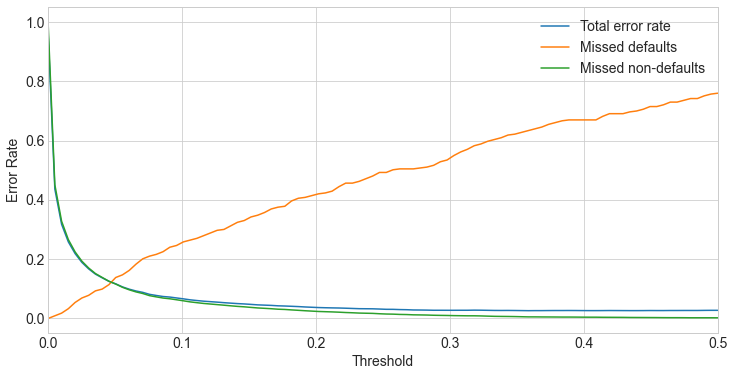

In [11]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(thresh, er, label='Total error rate')
plt.plot(thresh, der, label='Missed defaults')
plt.plot(thresh, nder, label='Missed non-defaults')
plt.xlim(0, 0.5)
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.legend();

How do we know what threshold value is best? Unfortunately there's no formula for it. "Such a decision must be based on *domain knowledge*, such as detailed information about costs associated with defaults" (James et al. (2013, p.147)) and it will always be a **trade-off: if we increase the threshold we reduce the missed non-defaults but at the same time increase the missed defaults**.

## Performance Metrics

This is now the perfect opportunity to refresh our memory on a few classification performance measures introduced in the previous chapters and add a few more to have a more rounded bag of performance metrics. The following table will help in doing this.

<img src="Graphics/0208_ConfusionMatrixDefault.png" alt="ConfusionMatrixDefault" style="width: 800px;"/>

We will use the following abbreviations ([Markham (2016)](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb)): 

* True Positives (TP): correctly predicted defaults
* True Negatives (TN): correctly predicted non-defaults
* False Positives (FP): incorrectly predicted defaults ("Type I error")
* False Negatives (FN): incorrectly predicted non-defaults ("Type II error")

In [12]:
# Assign confusion matrix values to variables
confm = metrics.confusion_matrix(y_test, y_pred)
print(confm)
TP = confm[1, 1]  # True positives
TN = confm[0, 0]  # True negatives
FP = confm[0, 1]  # False positives
FN = confm[1, 0]  # False negatives

[[9645   22]
 [ 253   80]]


So far we've encountered the following performance metrics: 

* Score
* Error rate
* Sensitivity and 
* Specificity. 

We briefly recapture their meaning, how they are calculated and how to call them in Scikit-learn. We will make use of the functions in the `metrics` sublibrary of `sklearn`

#### Score
* Score = (TN + TP) / (TN + TP + FP + FN)
* Fraction of (overall) correctly predicted classes

In [13]:
print((TN + TP) / (TN + TP + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))
print(lda.score(X_test, y_test))

0.9725
0.9725
0.9725


#### Error rate
* Error rate = 1 - Score or Error rate = (FP + FN) / (TN + TP + FP + FN)
* Fraction of (overall) incorrectly predicted classes
* Also known as "Misclassification Rate"

In [14]:
print((FP + FN) / (TN + TP + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))
print(1 - lda.score(X_test, y_test))

0.0275
0.02749999999999997
0.02749999999999997


#### Specificity

* Specificity = TN / (TN + FP)
* Fraction of correctly predicted negatives (e.g. 'non-defaults')

In [15]:
print(TN / (TN + FP))

0.9977242164063308


#### Sensitivity or Recall
* Sensitivity = TP / (TP + FN)
* Fraction of correctly predicted 'positives' (e.g. 'defaults'). Basically asks the question: "When the actual value is positive, how often is the prediction correct?"
* Also known as **True positive rate**
* Counterpart to *Precision*

In [16]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.24024024024024024
0.24024024024024024


The above four classification performance metrics we already encountered. There are two more metrics we want to cover: **Precision** and the **F-Score**.


#### Precision
* Precision = TP / (TP + FP)
* Refers to the accuracy of a positive ('default') prediction. Basically asks the question: "When a positive value is predicted, how often is the prediction correct?" 
* Counterpart to *Recall*

In [17]:
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.7843137254901961
0.7843137254901961


<img src="Graphics/0208_ConfusionMatrixDefault.png" alt="ConfusionMatrixDefault" style="width: 800px;"/>

#### F-Score

Van Rijsbergen (1979) introduced a measure that is still widely used to evaluate the accuracy of predictions in two-class (binary) classification problems: the F-Score. It combines Precision and Recall (aka Sensitivity) in one metric and tells us something about the relations between data's positive labels and those given by a classifier. It is a single measure of a classification procedure's usefullness and in general the rule is that the higher the F-Score, the better the predictive power of the classification procedure. It is defined as:

\begin{align}
F_{\beta} &= \frac{(1 + \beta^2) \cdot \text{precision} \cdot \text{recall}}{\beta^2 \cdot \text{precision} + \text{recall}} \\[2ex]
          &= \frac{(1+\beta^2) \cdot TP}{(1+\beta^2) \cdot TP + \beta^2 \cdot FN + FP}
\end{align}

This measure employs a parameter $\beta$ that captures a user's preference (Guggenbuehler (2015)). The most common value for $\beta$ is 1. This $F_1$-score weights both precision and recall evenly (simple harmonic mean). In rare cases the $F_2$-score is used, which puts twice as much weights on recall as on precision (Hripcsak and Rotschild (2005)).



In [18]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))
print(((1+1**2) * TP)/((1+1**2) * TP + FN + FP))
print(metrics.classification_report(y_test, y_pred))

[[9645   22]
 [ 253   80]]
0.367816091954023
0.367816091954023
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9667
           1       0.78      0.24      0.37       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.68     10000
weighted avg       0.97      0.97      0.97     10000



Let us compare this to the situation where we set the posterior probability threshold for 'default' at 20%.

In [19]:
# Confusion matrix & clf-report for cut-off 
# value Pr(default=yes | X = x) > 0.20
print(metrics.confusion_matrix(y_test, y_pred020))
print(metrics.classification_report(y_test, y_pred020))

[[9435  232]
 [ 140  193]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9667
           1       0.45      0.58      0.51       333

    accuracy                           0.96     10000
   macro avg       0.72      0.78      0.74     10000
weighted avg       0.97      0.96      0.96     10000



We see that by reducing the cut-off level from $\Pr(\text{default} = 1| X=x) > 0.5$ to $\Pr(\text{default} = 1| X=x) > 0.2$ precision decreases but recall improves. This changes the $F_1$-score. 

Does this mean that a threshold of 20% is more appropriate? In general, one could argue for a 'yes'. Yet, as mentioned before, this boils down to domain knowledge. Where the $F_1$-score is of help, together with the other metrics introduced, is when we compare models against each other and want to determine which one performed best. For example if we compare results from logistic regression and LDA (and both used a cut-off level of 50%) the F-score would suggest that the one with the higher value performed better.

For a summary on performance metrics the following two ressources are recommended:

* For the interested reader an excellent and easily accessible summary on performance metrics is the article by [Sokolova and Lapalme (2009)](http://rali.iro.umontreal.ca/rali/sites/default/files/publis/SokolovaLapalme-JIPM09.pdf). 

* For further details and examples please also consider the [scikit-learn discription](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics).

## Precision-Recall Curve

If one is interested in understanding how precision and recall varies given different level of thresholds, then there is a function to do this. 

In [20]:
# Extract data displayed in above plot
precision, recall, _ = metrics.precision_recall_curve(y_test, posteriors[:, 1])

print('Precision: ', precision)
print('Recall:    ', recall)

Precision:  [0.05540765 0.05525046 0.05525965 ... 1.         1.         1.        ]
Recall:     [1.         0.996997   0.996997   ... 0.00600601 0.003003   0.        ]


This one can easily visualize - done in the next code snippet.  Note that the 
funciton `PrecisionRecallDisplay` has been added to `sklearn` version 0.22. 

We also add some more information to the plot by displaying the *Average Precision (AP)* and the *Area under the Curve (AUC)*. The former summarizes the plot in that it calculates the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight [see further description here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html). The latter calculates the area under the curve using the trapezoidal rule. Notice that ideally the function hugs the top-right corner. 

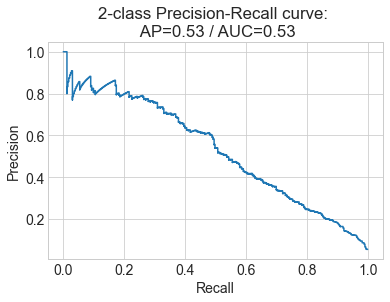

In [21]:
from sklearn.metrics import PrecisionRecallDisplay

# Calculate the average precisions score
y_dec_bry = lda.decision_function(X_test)
average_precision = metrics.average_precision_score(y_test, y_dec_bry)

# Calculate AUC
prec_recall_auc = metrics.auc(recall, precision)

# Plot Precision/Recall variations given different
# levels of thresholds
fig_pr = PrecisionRecallDisplay(precision=precision, 
                                recall=recall).plot()
fig_pr.ax_.set_title('2-class Precision-Recall curve: \n AP={0:0.2f} / AUC={1:0.2f}'.format(
                     average_precision, prec_recall_auc));

## ROC Curve

Having introduced the major performance measures, let us now discuss the so called ROC curve (short for "receiver operating characteristics"). This is a very popular way of visualizing the performance of binary classifiers. Its origin are in signal detection theory durign WWII (Flaach (2017)) but it has since found application in medical decision making and machine learning ([Fawcett (2006)](http://people.inf.elte.hu/kiss/13dwhdm/roc.pdf)). ROC investigates the relationship between sensitivity and specificity of a binary classifier. Sensitivity (or true positive rate) measures the proportion of positives (defaults) correctly classified. Specificity (or true negative rate) measures the proportion of negatives (non-defaults) correctly classified. 

Above we calculated that if we use $\Pr(\text{default = Yes}|X=x) > 0.5$ to classify posterior probabilities as defaults, LDA has its best overall error rate but misses on 76.0% of the customers who acutally defaulted. By decreasing the threshold to 0.2 we improved the accuracy of detecting defaults but this came at the cost of a higher overall error rate. This was the trade-off we faced. The ROC curve serves to visualize a variation of this trade-off. It varies the cut-off threshold from 0 to 1 and calculates for each threshold the true positive rate (aka sensitivity) and false positive rate (equals 1 - specificity). These values are then plotted with the former on the vertical and the later on the horizontal axis. 

Though this might feel a bit abstract if one is not familiar with all these technical terms, the interpretation is fortunately fairly simple. The ideal ROC curve will hug the top left corner. In that case, the area under the curve (AUC) is biggest. The bigger the AUC, the better the classifier. A perfect classifier has an AUC of 1.

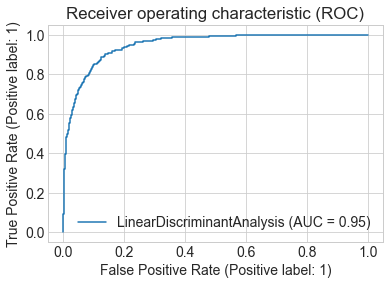

In [22]:
fig_roc = metrics.plot_roc_curve(lda, X_test, y_test);
fig_roc.ax_.set_title('Receiver operating characteristic (ROC)');

Please be aware that by default `estimators.classes_[1]` is considered as the positive class. You can change this with the `pos_label` parameter within the `plot_roc_curve` function. Note also, that this function was introduced with version 0.22 but will be removed in 1.2 in favor of `sklearn.metric.RocCurveDisplay.from_predictions` or `sklearn.metric.RocCurveDisplay.from_estimator`. 

If you wish to overlay ROCs from multiple models [see this example.](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

Below is a more extensive, yet more approachable code that does the same. 

In [23]:
# Compute ROC curve and ROC area (AUC) for each class
fpr, tpr, thresholds = metrics.roc_curve(y_test, posteriors[:, 1])
roc_auc = metrics.auc(fpr, tpr)

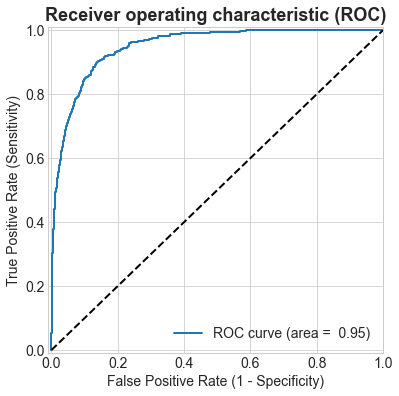

In [24]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {0: 0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight='bold', fontsize=18)
plt.legend(loc="lower right");

An AUC value of 0.95 is close to the maximum of 1 and should be deemed very good. The dashed black line puts this in perspective: it represents the "no information" classifier; this is what we would expect if the probability of default is not associated with 'student' status and 'balance'. Such a classifier, that performs no better than chance, is expected to have an AUC of 0.5. 

## Quadratic Discriminant Analysis

### Underlying Assumptions

For LDA we assume that observations within each class are drawn from a multivariate normal distribution with a class-specific mean vector and a common covariance metrix: $X \sim N(\mu_k, \Sigma)$. Quadratic discriminant analysis (QDA) relaxes these assumptions somewhat. The basic assumption is still that the observations follow a multivariate normal distribution, however, QDA allows for class specific means and covariance matrices: $X \sim N(\mu_k, \Sigma_k)$, where $\Sigma_k$ is a covariance matrix for the $k$th class. With that, the Bayes classifier assigns an observation to the class for which 

\begin{equation}
\delta_k(x) = \arg \max_k \; - \frac{1}{2} \ln(|\Sigma_k|) - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \ln(\Pr(k))
\end{equation}

is highest. For a derivation of this result see again the appendix of the script. As was the case for LDA, parameter $\mu_k, \Sigma_k$ and $\Pr(k)$ are again estimated from the training data with the same formulas introduced in this notebook. 

Below figure depict both LDA and QDA. Both classifiers were trained on the same data. Due to the different variability of the two classes the QDA algorithm seems to perform slightly better in this case.

<img src="Graphics/0208_QDABayesDescBoundary2d.png" alt="QDABayesDescBoundary2d" style="width: 1000px;"/>

Under what circumstances should we prefer QDA over LDA? As always, there's no straight answer to this question. Obviously, performance should be king. However, it is said that LDA tends to be a better bet than QDA if the training set is small. In contrast, if the hold-out set is large or the assumption of a common covariance matrix is clearly incorrect, then QDA is recommended. Beyond that, we have to keep in mind that QDA estimates $K p(p+1)/2$ parameters. So if the number of parameters $p$ is large, QDA might take some time to process (James et al. (2013)). 

> **Naive Bayes**

> Naive Bayes is the name for a family of popular ML algorithms that are often used in text mining. Text mining is a field of ML that deals with extracting quantitative information from text. A simple example of it is the analysis of Twitter feeds in order to predict stock market reactions. There exist different variations of Naive Bayes applications. One is called 'Gaussian Naive Bayes' and works similar to QDA - with the exception that contrary to QDA the covariance matrices $\Sigma$ are assumed to be diagonal. This means $\Sigma_k$ only contains the variances of the different features for class $k$. Its covariance terms (the off-diagonal elements) are assumed to be zero. Because of its popularity, Naive Bayes is well documented in text books and on the web. A good starting point is Scikit-learn's tutorial on [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html), Collins (2013) or Russell and Norvig (2009, p.499). To apply the algorithm in Python you want to use `sklearn.naive_bayes.GaussianNB()` or (for text mining preferably) `sklearn.naive_bayes.MultinomialNB()`. 

### QDA in Python

The application of QDA follows the one detailed for LDA. Therefore we let the code speak for itself.

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Run qda on training data
qda = QDA().fit(X_train, y_train)
qda

QuadraticDiscriminantAnalysis()

In [26]:
# Predict classes for qda
y_pred_qda = qda.predict(X_test)
posteriors_qda = qda.predict_proba(X_test)[:, 1]

# Print performance metrics
print(metrics.confusion_matrix(y_test, y_pred_qda))
print(qda.score(X_test, y_test))
print(metrics.classification_report(y_test, y_pred_qda))

[[9636   31]
 [ 239   94]]
0.973
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9667
           1       0.75      0.28      0.41       333

    accuracy                           0.97     10000
   macro avg       0.86      0.64      0.70     10000
weighted avg       0.97      0.97      0.97     10000



The performance seems to be slightly better than with LDA. Let's plot the ROC curve for both LDA and QDA.

In [27]:
# Compute ROC curve and ROC area (AUC) for each class
fpr_qda, tpr_qda, _ = metrics.roc_curve(y_test, posteriors_qda)
roc_auc_qda = metrics.auc(fpr_qda, tpr_qda)

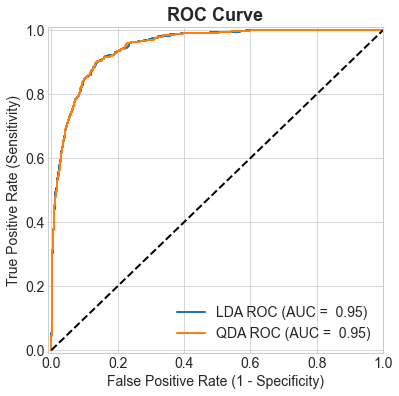

In [28]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label='LDA ROC (AUC = {0: 0.2f})'.format(roc_auc))
plt.plot(fpr_qda, tpr_qda, lw=2, label='QDA ROC (AUC = {0: 0.2f})'.format(roc_auc_qda))
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc="lower right");

With respect to Sensitivity (Recall) and Specificity LDA and QDA perform virtually identical. Therefore, one might give the edge here to QDA because of its slighly better Recall and $F_1$-Score. 

## Reality and the Gaussian Assumption for LDA & QDA

Despite the rather strict assumptions regarding normal distribution, LDA and QDA perform well on an amazingly large and diverse set of classification tasks. Friedman et al. (2001, p. 111) put it this way:

> "*Both techniques are widely used, and entire books are devoted to LDA. It seems that whatever exotic tools are the rage of the day, we should always have available these two simple tools. The question arises why LDA and QDA have such a good track record. The reason is not likely to be that the data are approximately Gaussian, and in addition for LDA that the covariances are approximately equal. More likely a reason is that the data can only support simple decision boundaries such as linear or quadratic, and the estimates provided via the Gaussian models are stable. This is a bias variance tradeoff - we can put up with the bias of a linear decision boundary because it can be estimated with much lower variance than more exotic alternatives. This argument is less believable for QDA, since it can have many parameters itself - although perhaps fewer than the non-parametric alternatives.*"

Whether LDA or QDA should be applied to categorical/binary features warrants a separate note. It is true that discriminant analysis was designed for continuous features (Ronald A. Fisher (1936)) where the underlying assumption is that the values are normally distributed. However, as above quote shows, studies have proven the robustness of the model even in light of violations of the rather rigid normality assumption. This is not only true for continuous features but also for categorical/binary features. For more details see Huberty et al. (1986). It follows that applying LDA and QDA is possible, though the user should cautiously control the output. We will discuss appropriate cross validation methods to do so in the next chapter. 

# Further Ressources


In writing this notebook, many ressources were consulted. For internet ressources the links are provided within the textflow above and will therefore not be listed again. Beyond these links, the following ressources were consulted and are recommended as further reading on the discussed topics:

* Collins, Michael, 2013, The Naive Bayes Model, Maximum-Likelihood Estimation, and the EM Algorithm, Technical report, Columbia University, New York.
* Fawcett, Tom, 2006, An introduction to ROC analysis, *Pattern Recognition Letters* 27, 861–874.
* Fisher, Roland A., 1936, The Use of Multiple Measurements in Taxonomic Problems, *Annals of Human Genetics* 7, 179-188.
* Flach, Peter A., 2017, Roc analysis, in Claude Sammut, and Geoffrey I. Webb, eds., *Encyclopedia of Machine Learning and Data Mining*, 1109–1116 (Springer Science & Business Media, New York, NY).
* Friedman, Jerome, Trevor Hastie, and Robert Tibshirani, 2001, *The Elements of Statistical Learning* (Springer, New York, NY).
* Guggenbuehler, Jan P., 2015, Predicting Net New Money Using Machine Learning Algorithms and Newspaper Articles, Technical report, University of Zurich, Zurich.
* James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani, 2013, *An Introduction to Statistical Learning: With Applications in R* (Springer Science & Business Media, New York, NY).
* Jobson, J. David, and Bob Korkie, 1980, Estimation for Markowitz Efficient Portfolios, *Journal of the American Statistical Association* 75, 544–554.
* Hripcsak, George, and Adam S Rothschild, 2005, Agreement, the F-measure, and Reliability in Information Retrieval, *Journal of the American Medical Informatics Association* 12, 296–298.
* Huberty, Carl J., Joseph M. Wisenbaker, Jerry D. Smith, and Janet C. Smith, 1986, Using Categorical Variables in Discriminant Analysis, *Multivariate Behavioral Research* 21, 479-496.
* Ledoit, Olivier, and Michael Wolf, 2004, Honey, i shrunk the sample covariance matrix, *The Journal of Portfolio Management* 30, 110–119.
* Müller, Andreas C., and Sarah Guido, 2017, *Introduction to Machine Learning with Python* (O’Reilly Media, Sebastopol, CA).
* Raschka, Sebastian, 2014, Naive Bayes and Text Classification I - Introduction and Theory from website, http://sebastianraschka.com/Articles/2014_naive_bayes_1.html, 08/31/2017
* Russell, Stuart, and Peter Norvig, 2009, *Artificial Intelligence: A Modern Approach* (Prentice Hall Press, Upper Saddle River, NJ).
* Sokolova, Marina, and Guy Lapalme, 2009, A systematic analysis of performance measures for classification tasks, *Information Processing & Management* 45, 427–437.
* Van Rijsbergen, Cornelis Joost, 1979, *Information Retrieval* (Butterworths, London).

# Addendum

## predict, predict_proba, and decision_function


Let us quickly discuss the difference between the 
* `classifier.predict()`, 
* `classifier.predict_proba()`, and 
* `classifier.decision_function()`. 

`classifier.predict()` we already know: it simply predicts the label given the traineded classifier and a feature matrix X (preferably a test set).

In [29]:
lda.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

`classifier.predict_proba()` we have also introduced above: it provides probabilities of $\Pr(y = 0|X=x)$ in the first column and $\Pr(y = 1|X=x)$ in the second. 

In [30]:
lda.predict_proba(X_test)[:10]

array([[9.96778003e-01, 3.22199657e-03],
       [9.97311835e-01, 2.68816484e-03],
       [9.85293824e-01, 1.47061759e-02],
       [9.98816468e-01, 1.18353192e-03],
       [9.95978476e-01, 4.02152411e-03],
       [9.95793515e-01, 4.20648549e-03],
       [9.95593550e-01, 4.40644998e-03],
       [9.97315195e-01, 2.68480456e-03],
       [9.77081674e-01, 2.29183256e-02],
       [9.99906164e-01, 9.38359460e-05]])

Finally, `classifier.decision_function()` predicts confidence scores given the feature matrix. The confidence scores for a feature matrix is the signed distance of that sample to the hyperplane. What this exaclty means should become more clear once we have discussed the support vector classifier (SVC). 

In [31]:
lda.decision_function(X_test)[:10]

array([-5.73452686, -5.91620475, -4.20467236, -6.73806793, -5.51206468,
       -5.46691242, -5.42026972, -5.91745893, -3.75263341, -9.27386872])